# Simple Linear Regression


We will apply the simple linear regression to a supernova data set to estimate the age of the universe.
We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Recall a simple linear regression is a straight-line fit to data and takes the form
$$
y = ax + b
$$
where $a$ is the *slope*, and $b$ is the *intercept*.

### Big Bang Theory

In the early 20th century, the most popular cosmological theory suggested that the universe had always existed at a fixed size. Today, the Big Bang theory prevails: Our universe started out very small and is still expanding. A consequence of this is Hubble's Law, which states that every celestial object that's reasonably far away from Earth (for example, another galaxy) is moving away from us at a constant speed. If we extrapolate that motion backwards to the time when everything in the universe was in the same place, that time is (roughly) the beginning of the universe! Scientists have used this fact, along with measurements of the current location and movement speed of other celestial objects, to estimate the age of the universe.

We need to know the distance-from-Earth and speed-away-from-Earth of many celestial objects. Using pictures taken by very accurate telescopes and a lot of physics, astronomers have been able to estimate both. It turns out that nearby supernovae -- stars that have recently died and exploded -- are among the best sources of this data, because they are very easy to see. This picture taken by the Hubble telescope shows an entire galaxy, with a single supernova - as bright by itself as billions of stars - at the bottom left.

![](galaxy.png)

### Supernova Data

Let's read and plot the supernova data set which records the distance-from-Earth (in million parsecs) and speed-away-from-Earth (in parsecs per year) of 156 supernovae:

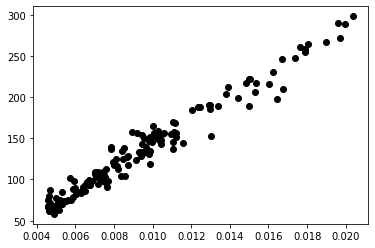

In [2]:
data = pd.read_csv("supernova.csv") #read the data
plt.scatter(data['Speed'],data['Distance'],color="Black"); #make the scatter plot

We can use Scikit-Learn's ``LinearRegression`` to fit this data and construct the best-fit line:

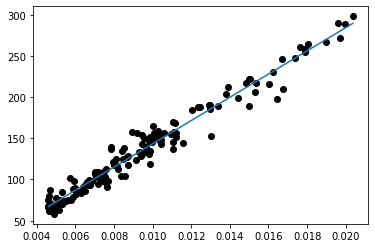

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(data[['Speed']], data['Distance']) #fit the simple linear regression

xfit = np.linspace(min(data['Speed']), max(data['Speed']), 1000).reshape((-1, 1))
yfit = model.predict(xfit)

plt.scatter(data['Speed'],data['Distance'],color="Black")
plt.plot(xfit, yfit); #plot the fitted line 

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     14094.533879003317
Model intercept: 2.4090787228899444


### Conclusion
Even with this simple approach and data set, our estimate of the age of the universe {{round(model.coef_[0])}} million years is pretty close to the scientistis estimate -- 13.8 billion years! 